## Dataset Creation

In [1]:
%pip install bing-image-downloader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from bing_image_downloader import downloader

# Define the categories
categories = ['deer', 'parrot']
image_count = 100

# Download the images
for category in categories:
    downloader.download(category, limit=image_count, output_dir='data', adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\A4\data\deer


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://cdn.britannica.com/40/109040-050-62EEDEA6/Male-white-tailed-deer.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://upload.wikimedia.org/wikipedia/commons/f/f3/Fallow_deer_in_field.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/0/09/White-tailed_deer_at_Greenough_Park,_Missoula.JPG
[%] File Downloaded !

[%] Downloading Image #4 from http://matthansenphotography.com/wp-content/uploads/2017/03/whitetail-deer-photography_mhp_082900086.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://upload.wikimedia.org/wikipedia/commons/b/b7/White-tailed_deer.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://upload.wikimedia.org/wikipedia/commons/5/50/Red_deer_stag_2009_denmark.jpg
[%] File Downloaded !

[%] Downloadi

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

original_dir = 'data'
deer_dir = os.path.join(original_dir, 'deer')
parrot_dir = os.path.join(original_dir, 'parrot')

train_dir = os.path.join(original_dir, 'train')
test_dir = os.path.join(original_dir, 'test')

deer_train_dir = os.path.join(train_dir, 'deer')
deer_test_dir = os.path.join(test_dir, 'deer')
parrot_train_dir = os.path.join(train_dir, 'parrot')
parrot_test_dir = os.path.join(test_dir, 'parrot')

# Create the new directories if they don't exist
os.makedirs(deer_train_dir, exist_ok=True)
os.makedirs(deer_test_dir, exist_ok=True)
os.makedirs(parrot_train_dir, exist_ok=True)
os.makedirs(parrot_test_dir, exist_ok=True)

# Function to split the data
def split_data(src_dir, train_dir, test_dir, test_size=0.2):
    files = os.listdir(src_dir)
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

    for file in train_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(train_dir, file))

    for file in test_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(test_dir, file))

split_data(deer_dir, deer_train_dir, deer_test_dir)
split_data(parrot_dir, parrot_train_dir, parrot_test_dir)

# Remove the old directories (if they are empty)
if not os.listdir(deer_dir):
    os.rmdir(deer_dir)

if not os.listdir(parrot_dir):
    os.rmdir(parrot_dir) 

## Binary Classifcation

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.optimizers import Adam
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard

In [3]:
train_dir = 'dataset_dogs_vs_cats/train'
test_dir = 'dataset_dogs_vs_cats/test'

datagen = ImageDataGenerator(rescale=1./255)

# Load the training images without augmentation
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

# Load the test images
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [4]:
def log_results(model, history):
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

    training_loss = history.history['loss'][-1]
    training_accuracy = history.history['accuracy'][-1]

    return {
        "training_loss": training_loss,
        "training_accuracy": training_accuracy,
        "test_accuracy": test_accuracy,
        "num_parameters": model.count_params()
    }

In [15]:
def summarize_diagnostics(history):

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

### VGG (1 Block)

In [ ]:
def vgg_1block():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model_1 = vgg_1block()
history_1 = model_1.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_1 = log_results(model_1, history_1)
print(f"Model 1 Results: {results_1}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4520 - loss: 4.3667 - val_accuracy: 0.5128 - val_loss: 2.8431
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5039 - loss: 2.7794 - val_accuracy: 0.5128 - val_loss: 1.1154
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5137 - loss: 0.9933 - val_accuracy: 0.4359 - val_loss: 0.6894
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5391 - loss: 0.6842 - val_accuracy: 0.4872 - val_loss: 0.6973
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5771 - loss: 0.6790 - val_accuracy: 0.4872 - val_loss: 0.6853
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6307 - loss: 0.6644 - val_accuracy: 0.4359 - val_loss: 0.6779
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7344 - loss: 0.6412 - val_accuracy: 0.4872 - val_loss: 0.6832
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6323 - loss: 0.6122 - val_accuracy: 0.5897 - val_loss: 0.6824
Epoch 9/10
3/3 

In [9]:
log_results(model_1, history_1)

{'training_loss': 0.4577358663082123,
 'training_accuracy': 0.768750011920929,
 'test_accuracy': 0.5897436141967773,
 'num_parameters': 10636481}

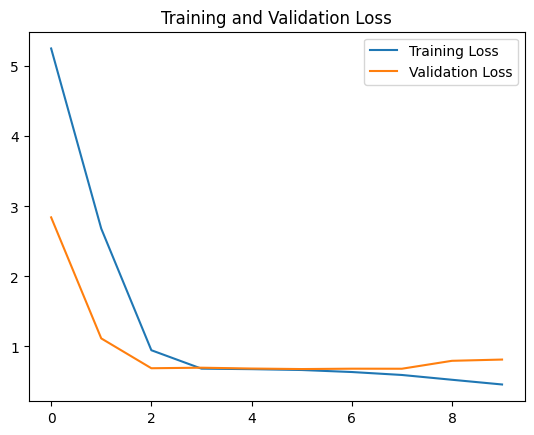

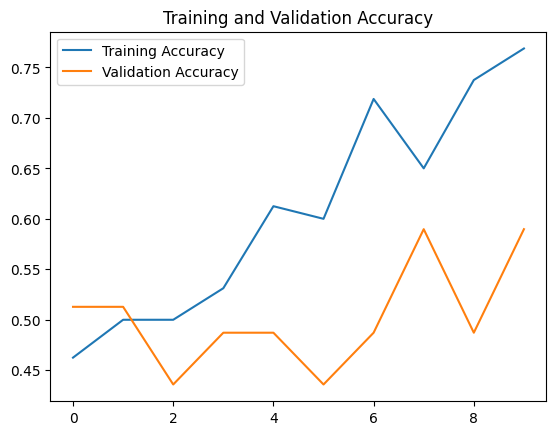

In [16]:
summarize_diagnostics(history_1)

### VGG (3 blocks)

In [17]:
def vgg_3blocks():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model_2 = vgg_3blocks()
history_2 = model_2.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_2 = log_results(model_2, history_2)
print(f"Model 2 Results: {results_2}")

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5199 - loss: 1.7223 - val_accuracy: 0.5128 - val_loss: 0.9125
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4891 - loss: 0.9100 - val_accuracy: 0.5128 - val_loss: 0.6921
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4805 - loss: 0.6939 - val_accuracy: 0.4359 - val_loss: 0.6844
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.5615 - loss: 0.6774 - val_accuracy: 0.5385 - val_loss: 0.6818
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.5979 - loss: 0.6428 - val_accuracy: 0.6154 - val_loss: 0.6645
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.7047 - loss: 0.5896 - val_accuracy: 0.5128 - val_loss: 0.7852
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6526 - loss: 0.6174 - val_accuracy: 0.5385 - val_loss: 0.6961
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7203 - loss: 0.5673 - val_accuracy: 0.5385 - val_loss: 0.6630
Epoch 9/10
3/3 ━

In [19]:
log_results(model_2, history_2)

{'training_loss': 0.5018583536148071,
 'training_accuracy': 0.762499988079071,
 'test_accuracy': 0.6666666865348816,
 'num_parameters': 4828481}

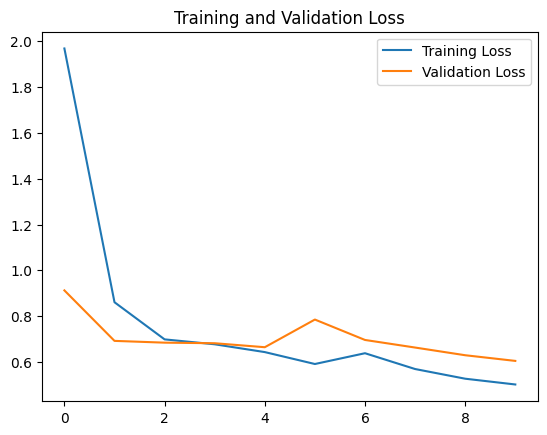

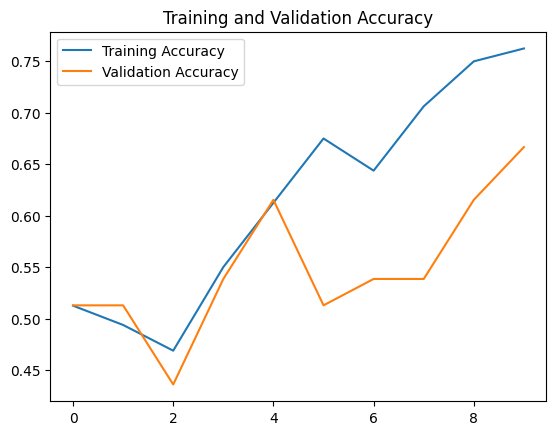

In [ ]:
summarize_diagnostics(history_2)

### VGG (3 blocks) with data augmentation

In [21]:
aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_aug = aug_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [22]:
model_3 = vgg_3blocks()
history_3 = model_3.fit(
    train_generator_aug,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_3 = log_results(model_3, history_3)
print(f"Model 3 Results: {results_3}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5289 - loss: 1.3507 - val_accuracy: 0.5128 - val_loss: 1.7696
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4883 - loss: 1.5056 - val_accuracy: 0.4872 - val_loss: 0.7008
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.4943 - loss: 0.6985 - val_accuracy: 0.6410 - val_loss: 0.6826
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5883 - loss: 0.6827 - val_accuracy: 0.4872 - val_loss: 0.7089
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4966 - loss: 0.6836 - val_accuracy: 0.5128 - val_loss: 0.6951
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5773 - loss: 0.6653 - val_accuracy: 0.5641 - val_loss: 0.6598
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6128 - loss: 0.6348 - val_accuracy: 0.5897 - val_loss: 0.6637
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6372 - loss: 0.6182 - val_accuracy: 0.5128 - val_loss: 0.7997
Epoch 9/10
3/3 ━

In [ ]:
log_results(model_3, history_3)

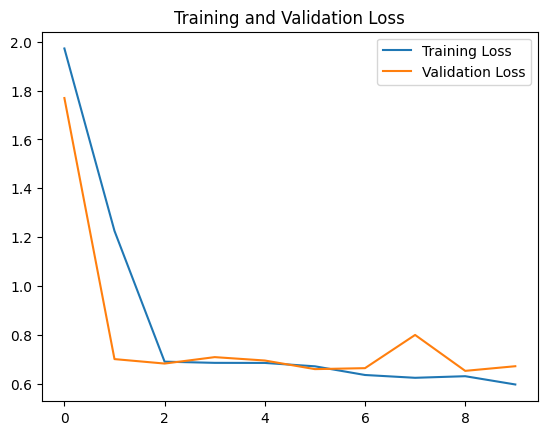

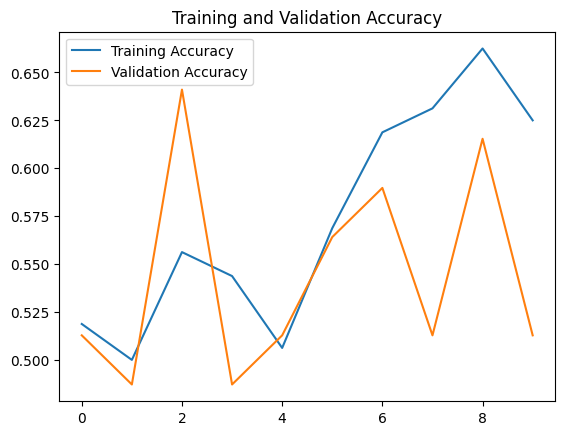

In [23]:
summarize_diagnostics(history_3)

### Transfer Learning using VGG16/VGG19 with Fine-tuning All Layer

In [24]:
def transfer_learning_full_finetune():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = True

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [25]:
model_4 = transfer_learning_full_finetune()
history_4 = model_4.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_4 = log_results(model_4, history_4)
print(f"Model 4 Results: {results_4}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 13s/step - accuracy: 0.5479 - loss: 0.7333 - val_accuracy: 0.6154 - val_loss: 0.6785
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 9s/step - accuracy: 0.6854 - loss: 0.5818 - val_accuracy: 0.5897 - val_loss: 0.6092
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 10s/step - accuracy: 0.9208 - loss: 0.4330 - val_accuracy: 0.7179 - val_loss: 0.5482
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 14s/step - accuracy: 0.9536 - loss: 0.3394 - val_accuracy: 0.7179 - val_loss: 0.4994
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 15s/step - accuracy: 0.9911 - loss: 0.2313 - val_accuracy: 0.7692 - val_loss: 0.4631
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 32s 9s/step - accuracy: 0.9898 - loss: 0.1588 - val_accuracy: 0.8205 - val_loss: 0.4177
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 8s/step - accuracy: 1.0000 - loss: 0.1009 - val_accuracy: 0.8462 - val_loss: 0.3824
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 12s/step - accuracy: 1.0000 - loss: 0.0652 - val_accuracy: 0.8205 - val_loss: 0.3702
Epo

In [ ]:
log_results(model_4, history_4)

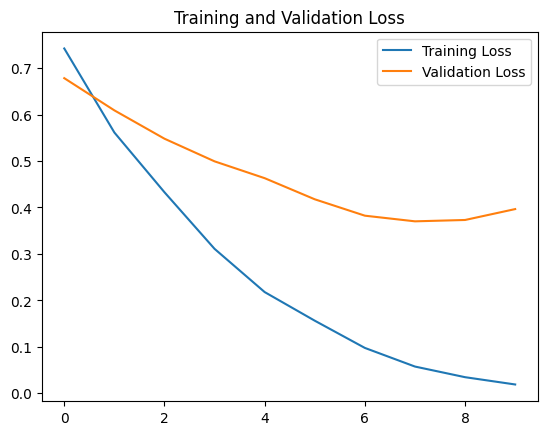

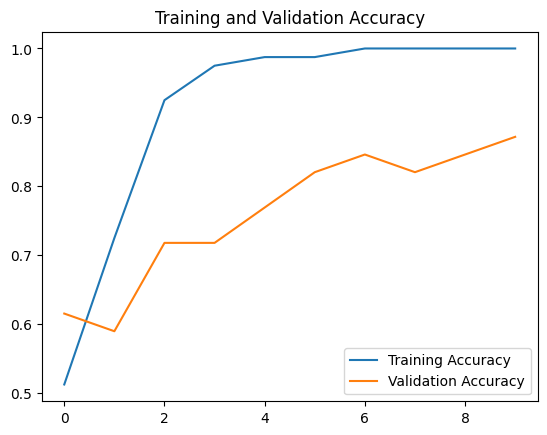

In [26]:
summarize_diagnostics(history_4)

### Transfer Learning using VGG16/VGG19 with Fine-tuning Only Final MLP Layers

In [27]:
def transfer_learning_finetune_fc():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # Freeze convolutional layers

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [28]:
model_5 = transfer_learning_finetune_fc()
history_5 = model_5.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=1
)

results_5 = log_results(model_5, history_5)
print(f"Model 5 Results: {results_5}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:890: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.5734 - loss: 0.6708 - val_accuracy: 0.5385 - val_loss: 0.6768
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.6055 - loss: 0.6495 - val_accuracy: 0.5385 - val_loss: 0.6703
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7156 - loss: 0.6158 - val_accuracy: 0.5897 - val_loss: 0.6631
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7510 - loss: 0.5989 - val_accuracy: 0.5897 - val_loss: 0.6559
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7891 - loss: 0.5791 - val_accuracy: 0.6154 - val_loss: 0.6482
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8301 - loss: 0.5571 - val_accuracy: 0.5897 - val_loss: 0.6420
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9016 - loss: 0.5259 - val_accuracy: 0.5897 - val_loss: 0.6358
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.8979 - loss: 0.5126 - val_accuracy: 0.6154 - val_loss: 0.6302
Epoch 9/

In [29]:
log_results(model_5, history_5)

{'training_loss': 0.4794383943080902,
 'training_accuracy': 0.918749988079071,
 'test_accuracy': 0.6153846383094788,
 'num_parameters': 15763521}

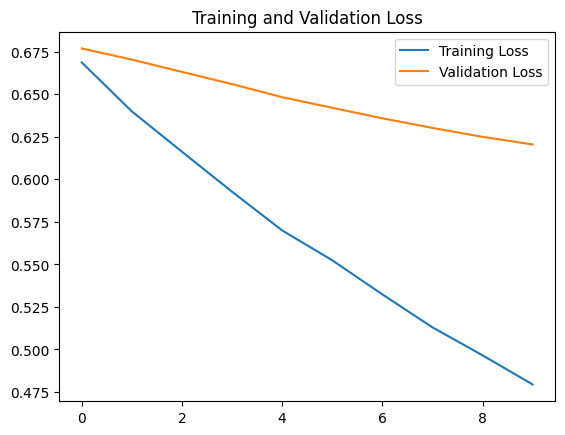

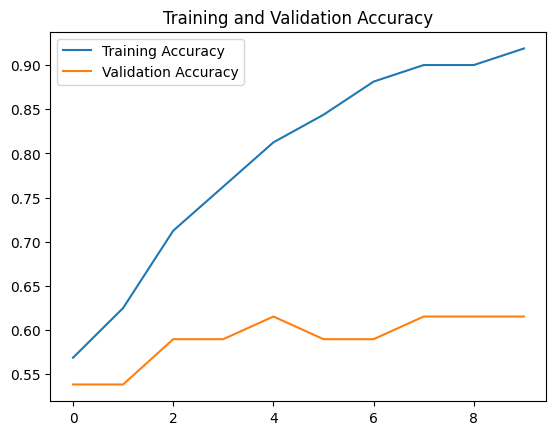

In [30]:
summarize_diagnostics(history_5)

## Tensorboard

In [31]:
from torch.utils.tensorboard import SummaryWriter

In [32]:
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.BinaryAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.BinaryAccuracy('test_accuracy')

In [42]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
num_classes = 3  # Example for 3 classes

In [43]:
def train_step(model, optimizer, x_train, y_train):
  y_train=y_train.reshape(-1,1)
  with tf.GradientTape() as tape:
    predictions = model(x_train, training=True)
    loss = loss_object(y_train, predictions)
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  
  train_loss(loss)
  train_accuracy(y_train, predictions)

def test_step(model, x_test, y_test):
  y_test=y_test.reshape(-1,1)
  predictions = model(x_test)
  loss = loss_object(y_test, predictions)
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  test_loss(loss)
  test_accuracy(y_test, predictions)

In [44]:
def log_predictions(epoch, model, test_generator, file_writer_pred):
    # Get a batch of test data
    test_images, test_labels = next(test_generator)
    
    # Predict the values from the test dataset (on the batch)
    test_pred_raw = model.predict(test_images)
    #test_pred = np.argmax(test_pred_raw, axis=1)
    test_pred = np.where(test_pred_raw > 0.5, 1, 0)

    # Create an empty figure to log the images with predictions
    fig, axes = plt.subplots(4, 10, figsize=(10, 10))  # Adjust grid size as needed
    for i, ax in enumerate(axes.flat):
        if i < len(test_images):
            ax.imshow(test_images[i])
            ax.set_title(f"True: {test_labels[i]}, Pred: {test_pred[i]}",fontsize=2.6)
            ax.axis("off")  # Hide the axis
    
    # Convert the plot to a tensor and log it with TensorBoard
    plt.tight_layout()
    fig.canvas.draw()
    img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img_data = img_data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    with file_writer_pred.as_default():
        tf.summary.image("Test Predictions", np.expand_dims(img_data, axis=0), step=epoch)

In [45]:
def train_and_evaluate(model, train_generator, test_generator, logdir, epochs=5):
    train_summary_writer = tf.summary.create_file_writer(logdir + '/train')
    test_summary_writer = tf.summary.create_file_writer(logdir + '/test')
    file_writer_pred = tf.summary.create_file_writer(logdir + '/predictions')

    optimizer = tf.keras.optimizers.Adam()
    loss_object = tf.keras.losses.BinaryCrossentropy() 
    
    # Training loop
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        
        # Training step loop
        count = 0
        for batch, (x_train, y_train) in enumerate(train_generator):
            train_step(model, optimizer, x_train, y_train)

            # Log training loss and accuracy
            with train_summary_writer.as_default():
                tf.summary.scalar('loss', train_loss.result(), step=epoch * len(train_generator) + batch)
                tf.summary.scalar('accuracy', train_accuracy.result(), step=epoch * len(train_generator) + batch)

            count += 1
            if count >= len(train_generator):  # Stop after iterating through the generator
                break

        # Testing step loop
        count = 0
        for batch, (x_test, y_test) in enumerate(test_generator):
            test_step(model, x_test, y_test)

            # Log test loss and accuracy
            with test_summary_writer.as_default():
                tf.summary.scalar('loss', test_loss.result(), step=epoch * len(test_generator) + batch)
                tf.summary.scalar('accuracy', test_accuracy.result(), step=epoch * len(test_generator) + batch)

            count += 1
            if count >= len(test_generator):  # Stop after iterating through the generator
                break

        # Log predictions for the current epoch
        log_predictions(epoch, model, test_generator, file_writer_pred)

        # Print metrics at the end of the epoch
        template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}%, Test Loss: {:.4f}, Test Accuracy: {:.2f}%'
        print(template.format(epoch + 1,
                              train_loss.result(),
                              train_accuracy.result() * 100,
                              test_loss.result(),
                              test_accuracy.result() * 100))

        # Reset metrics for the next epoch
        train_loss.reset_state()
        test_loss.reset_state()
        train_accuracy.reset_state()
        test_accuracy.reset_state()

###  VGG (1 block) 

In [46]:
model_1 = vgg_1block()
train_and_evaluate(
    model=model_1,
    train_generator=train_generator,
    test_generator=test_generator,
    logdir="logs/images_1",
    epochs=5
)

Epoch 1/5


InvalidArgumentError: {{function_node __wrapped__SparseSoftmaxCrossEntropyWithLogits_device_/job:localhost/replica:0/task:0/device:CPU:0}} Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 [Op:SparseSoftmaxCrossEntropyWithLogits] name: 

### VGG (3 blocks)

In [55]:
model_2 = vgg_3_blocks()
train_and_evaluate(
    model=model_2,
    train_generator=train_generator,
    test_generator=test_generator,
    logdir="logs/images_2",
    epochs=5
)

c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


C:\Users\aashm\AppData\Local\Temp\ipykernel_17120\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 1.2047, Accuracy: 55.31%, Test Loss: 0.7948, Test Accuracy: 50.00%
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch 2, Loss: 0.7058, Accuracy: 50.00%, Test Loss: 0.6676, Test Accuracy: 55.00%
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 3, Loss: 0.6223, Accuracy: 55.62%, Test Loss: 0.6263, Test Accuracy: 65.00%
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch 4, Loss: 0.5714, Accuracy: 77.50%, Test Loss: 0.5333, Test Accuracy: 77.50%
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 5, Loss: 0.5424, Accuracy: 68.75%, Test Loss: 0.4918, Test Accuracy: 82.50%


### VGG (3 blocks) with data augmentation

In [56]:
model_3 = vgg_3_blocks()
train_and_evaluate(
    model=model_3,
    train_generator=train_generator_aug,
    test_generator=test_generator,
    logdir="logs/images_3",
    epochs=5
)

Epoch 1/5

c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


C:\Users\aashm\AppData\Local\Temp\ipykernel_17120\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 0.9191, Accuracy: 41.25%, Test Loss: 0.7405, Test Accuracy: 50.00%
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 2, Loss: 0.7007, Accuracy: 51.88%, Test Loss: 0.6918, Test Accuracy: 50.00%
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Epoch 3, Loss: 0.6765, Accuracy: 50.00%, Test Loss: 0.6750, Test Accuracy: 50.00%
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 4, Loss: 0.6267, Accuracy: 61.87%, Test Loss: 0.6916, Test Accuracy: 60.00%
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Epoch 5, Loss: 0.5602, Accuracy: 73.12%, Test Loss: 0.5670, Test Accuracy: 70.00%


### Transfer learning using VGG16 or VGG19 with tuning all layers

In [57]:
model_4 = transfer_learning_full_finetune()
train_and_evaluate(
    model=model_4,
    train_generator=train_generator,
    test_generator=test_generator,
    logdir="logs/images_4",
    epochs=5
)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step


C:\Users\aashm\AppData\Local\Temp\ipykernel_17120\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 1.1570, Accuracy: 55.62%, Test Loss: 7.7208, Test Accuracy: 50.00%
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step
Epoch 2, Loss: 2.9164, Accuracy: 53.12%, Test Loss: 0.7671, Test Accuracy: 50.00%
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step
Epoch 3, Loss: 0.7290, Accuracy: 51.25%, Test Loss: 3.7384, Test Accuracy: 50.00%
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step
Epoch 4, Loss: 1.6465, Accuracy: 50.63%, Test Loss: 0.7100, Test Accuracy: 50.00%
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 588ms/step
Epoch 5, Loss: 0.7003, Accuracy: 52.50%, Test Loss: 0.6806, Test Accuracy: 62.50%


### Transfer learning using VGG16 or VGG19 with tuning only final MLP layers

In [58]:
model_5 = transfer_learning_finetune_fc()
train_and_evaluate(
    model=model_5,
    train_generator=train_generator,
    test_generator=test_generator,
    logdir="logs/images_5",
    epochs=5
)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step


C:\Users\aashm\AppData\Local\Temp\ipykernel_17120\3700702329.py:21: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  img_data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


Epoch 1, Loss: 0.6879, Accuracy: 65.62%, Test Loss: 0.4537, Test Accuracy: 72.50%
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 559ms/step
Epoch 2, Loss: 0.1437, Accuracy: 95.62%, Test Loss: 0.0585, Test Accuracy: 100.00%
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step
Epoch 3, Loss: 0.0623, Accuracy: 96.88%, Test Loss: 0.0255, Test Accuracy: 100.00%
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step
Epoch 4, Loss: 0.0179, Accuracy: 100.00%, Test Loss: 0.0085, Test Accuracy: 100.00%
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step
Epoch 5, Loss: 0.0110, Accuracy: 99.38%, Test Loss: 0.0140, Test Accuracy: 100.00%


### Comparision

In [60]:
import pandas as pd
import time

# Function to capture model stats
def evaluate_model(model, train_data, test_data, epochs):
    # Measure training time
    start_time = time.time()
    history = model.fit(train_data, epochs=epochs, verbose=0)  # Train model
    training_time = time.time() - start_time  # Calculate training time

    # Get the final training loss and accuracy
    training_loss = history.history['loss'][-1]
    training_accuracy = history.history['accuracy'][-1] * 100  # Convert to percentage

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_data, verbose=0)
    test_accuracy = test_accuracy * 100  # Convert to percentage

    # Get the number of model parameters
    num_params = model.count_params()

    # Return all metrics
    return {
        'Training Time (s)': round(training_time, 2),
        'Training Loss': round(training_loss, 4),
        'Training Accuracy (%)': round(training_accuracy, 2),
        'Test Accuracy (%)': round(test_accuracy, 2),
        'Number of Parameters': num_params
    }

# Assuming you have multiple models
models = [model_1, model_2, model_3,model_4, model_5]
model_names = ['Model_1','Model_2','Model_3','Model_4','Model_5']

# Empty list to store model results
results = []

# Train and evaluate each model
for model, name in zip(models, model_names):
    if model==model_3:
        model_stats = evaluate_model(model, train_generator_aug, test_generator, epochs=5)
        model_stats['Model'] = name

    model_stats = evaluate_model(model, train_generator, test_generator, epochs=5)
    model_stats['Model'] = name  # Add model name
    results.append(model_stats)

# Create DataFrame from results
df = pd.DataFrame(results)

# Reorder columns
df = df[['Model','Training Time (s)','Training Loss','Training Accuracy (%)','Test Accuracy (%)','Number of Parameters']]

# Display the table
print(df)

     Model  Training Time (s)  Training Loss  Training Accuracy (%)  \
0  Model_1              31.40         0.0093                 100.00   
1  Model_2              79.25         0.3313                  87.50   
2  Model_3              58.71         0.1975                  93.12   
3  Model_4             173.63         0.6730                  65.00   
4  Model_5              97.65         0.0054                 100.00   

   Test Accuracy (%)  Number of Parameters  
0               87.5              10636481  
1               82.5               4828481  
2               82.5               4828481  
3               70.0              15763521  
4              100.0              15763521  


### Visualisation

In [ ]:
%tensorboard --logdir logs

Yes, the results align with expectations. Simpler models like VGG (1 block) struggle to capture complex features, resulting in lower accuracy. Models with more blocks (VGG 3 blocks) or transfer learning perform better, as they can extract richer features from images, improving classification performance.

Yes, data augmentation significantly helps. By creating variations of the original training images (through transformations like rotation, flipping, etc.), it increases the diversity of the dataset. This helps the model generalize better, reducing overfitting and improving performance on unseen images.

Yes, the number of epochs matters. Too few epochs may result in underfitting, where the model doesn't learn enough from the data. Too many epochs can lead to overfitting, where the model memorizes the training data but fails to generalize. Fine-tuning requires careful monitoring to find the optimal number of epochs.

The confusion generally arises, when the animal image is not in contrast with the surroundings. Since, in such a acase the model finds it hard to seperate the important features. The confusion, also arises in multiple parrots or deer are shown in a single image. However with complex models this is mitigated successfully. Another, is that some images might have totally diffenent colour than the already seen ones since the animals come in a vareity of breeds.

## MLP Model

In [12]:
class MLPModel(tf.keras.Model):
    def __init__(self, input_shape, num_classes):
        super(MLPModel, self).__init__()
        self.flatten = layers.Flatten(input_shape=input_shape, name="Flatten_Layer")
        self.hidden1 = layers.Dense(4096, activation='relu', name="Dense_Layer_1")
        self.hidden2 = layers.Dense(4096, activation='relu', name="Dense_Layer_2")
        self.hidden3 = layers.Dense(4096, activation='relu', name="Dense_Layer_3")
        self.hidden4 = layers.Dense(2048, activation='relu', name="Dense_Layer_4")
        self.hidden5 = layers.Dense(2048, activation='relu', name="Dense_Layer_5")
        self.hidden6 = layers.Dense(1024, activation='relu', name="Dense_Layer_6")
        self.output_layer = layers.Dense(num_classes, activation='sigmoid', name="Output_Layer")

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.hidden4(x)
        x = self.hidden5(x)
        x = self.hidden6(x)
        return self.output_layer(x)

In [13]:
input_shape = (150, 150, 3)
num_classes = 1

# Instantiate and compile the MLP model
mlp_model = MLPModel(input_shape=input_shape, num_classes=num_classes)
mlp_model.build(input_shape=(None, *input_shape))
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history = mlp_model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

mlp_model.summary()

c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\keras\src\layers\layer.py:391: UserWarning: `build()` was called on layer 'mlp_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.5117 - loss: 0.7108 - val_accuracy: 0.5000 - val_loss: 0.7306
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.5620 - loss: 0.6839 - val_accuracy: 0.5000 - val_loss: 0.6737
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.6771 - loss: 0.6333 - val_accuracy: 0.5500 - val_loss: 0.6608
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.7917 - loss: 0.5685 - val_accuracy: 0.5500 - val_loss: 0.6582
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.8680 - loss: 0.5108 - val_accuracy: 0.5000 - val_loss: 0.6639
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.8402 - loss: 0.4533 - val_accuracy: 0.6250 - val_loss: 0.6489
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.8854 - loss: 0.4003 - val_accuracy: 0.5750 - val_loss: 0.6339
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9172 - loss: 0.3465 - val_accuracy: 0.5500 - val_loss: 0.7354
Epoch 9/

Model: "mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten_Layer (Flatten)         │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_1 (Dense)           │ (None, 4096)           │   276,484,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_2 (Dense)           │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_3 (Dense)           │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_4 (Dense)           │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_5 (Dense)           │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Layer_6 (Dense)           │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 974,198,789 (3.63 GB)

 Trainable params: 324,732,929 (1.21 GB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 649,465,860 (2.42 GB)

The MLP model with a structure comparable to VGG16 performs decently, achieving moderate accuracy. Its classification is on par with the simpler, low-complexity VGG (1 block) model. However, the more complex models like VGG16, especially with transfer learning, clearly outperform the MLP model. This indicates that convolutional layers in VGG models, which are pre-trained on large datasets, are more effective at extracting complex image features, leading to superior performance compared to fully connected MLP architectures.

## Test on AI generated images

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to your images (replace these with your actual file paths)
image_paths = [
    'data/ai/deer_easy.jpg',
    'data/ai/deer_hard.jpg',
    'data/ai/parrot_easy.jpg',
    'data/ai/parrot_hard.jpg',
]

image_labels = [0, 0, 1, 1]  # 0 = Deer, 1 = Parrot

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)

### MLP Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


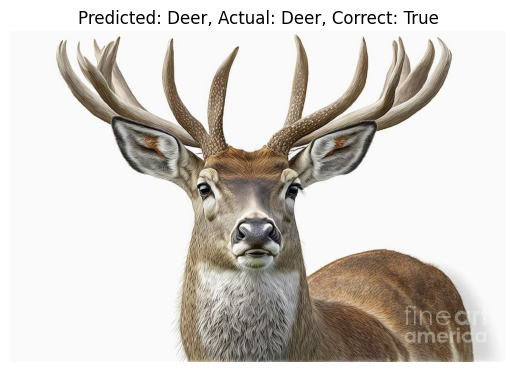

Image 1: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


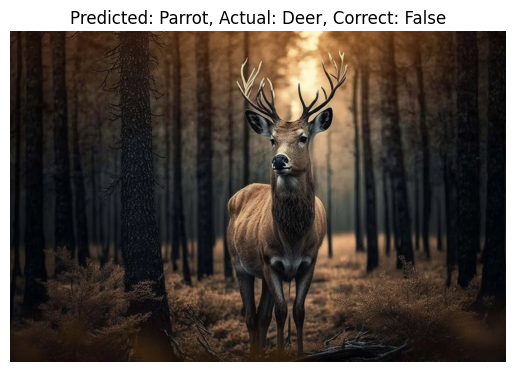

Image 2: Predicted class: Parrot, Actual class: Deer, Correct: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


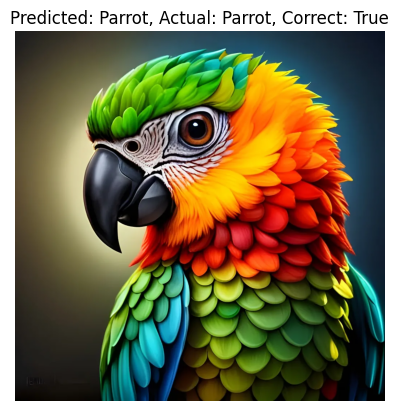

Image 3: Predicted class: Parrot, Actual class: Parrot, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


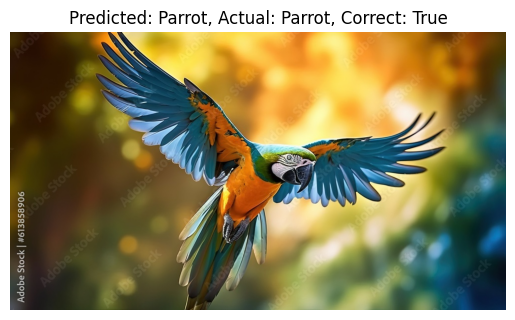

Image 4: Predicted class: Parrot, Actual class: Parrot, Correct: True


In [ ]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = mlp_model.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Parrot' if predicted_class == 1 else 'Deer'
    actual_class_name = 'Parrot' if actual_label == 1 else 'Deer'
    plt.title(f"Predicted: {predicted_class_name}, Actual: {actual_class_name}, Correct: {correct}")
    plt.axis('off')
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

### Model 1 : VGG (1 block)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


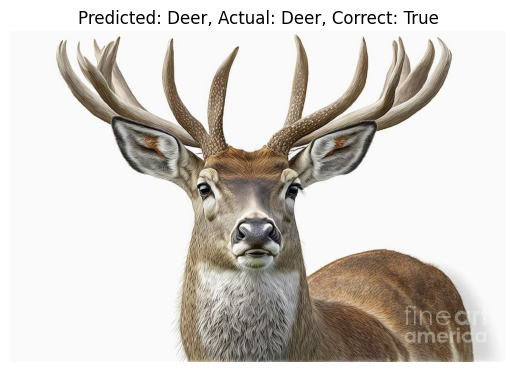

Image 1: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


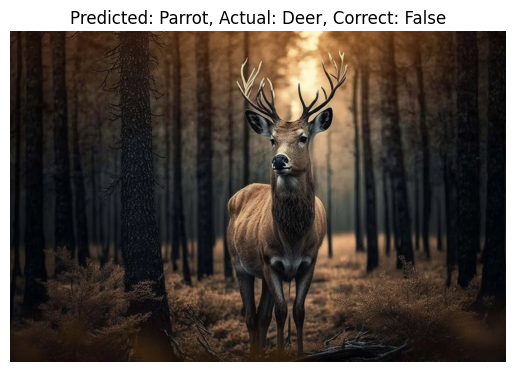

Image 2: Predicted class: Parrot, Actual class: Deer, Correct: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


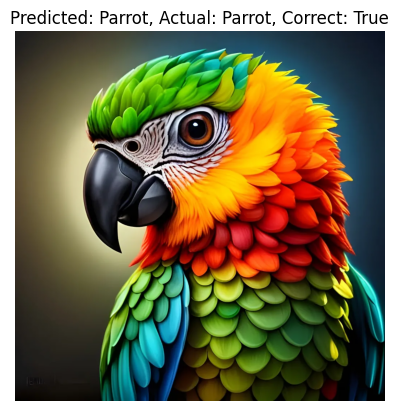

Image 3: Predicted class: Parrot, Actual class: Parrot, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


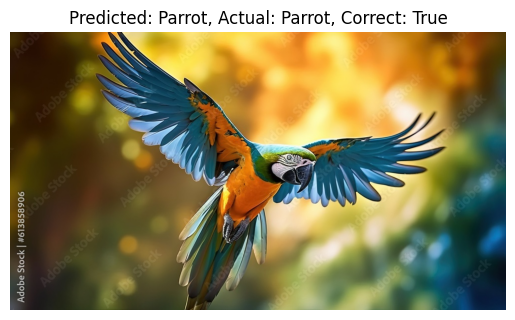

Image 4: Predicted class: Parrot, Actual class: Parrot, Correct: True


In [19]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_1.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Parrot' if predicted_class == 1 else 'Deer'
    actual_class_name = 'Parrot' if actual_label == 1 else 'Deer'
    plt.title(f"Predicted: {predicted_class_name}, Actual: {actual_class_name}, Correct: {correct}")
    plt.axis('off')
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

### Model 2 : VGG (3 blocks)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


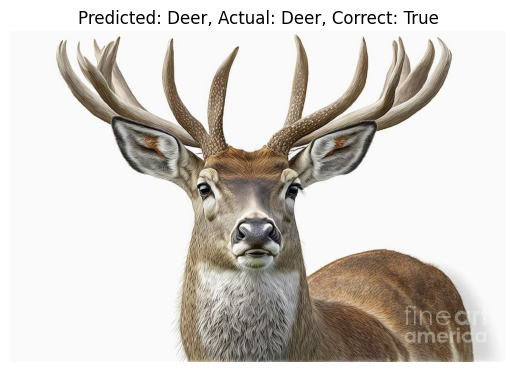

Image 1: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


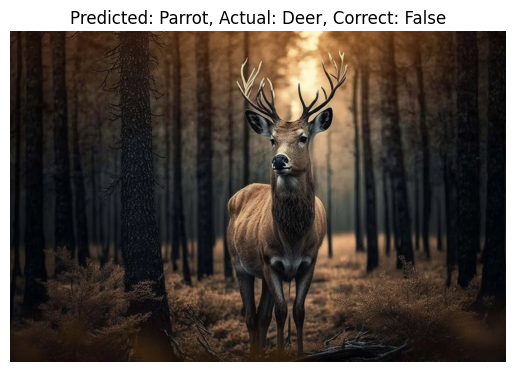

Image 2: Predicted class: Parrot, Actual class: Deer, Correct: False
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


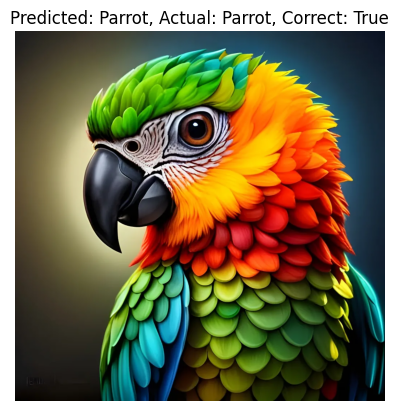

Image 3: Predicted class: Parrot, Actual class: Parrot, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


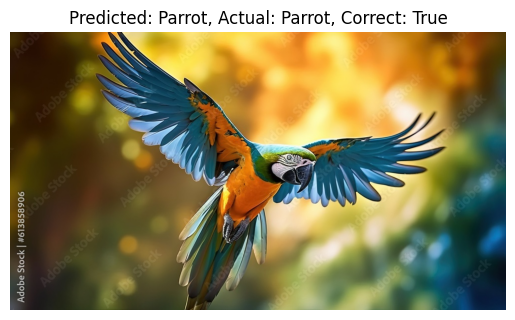

Image 4: Predicted class: Parrot, Actual class: Parrot, Correct: True


In [ ]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_2.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Parrot' if predicted_class == 1 else 'Deer'
    actual_class_name = 'Parrot' if actual_label == 1 else 'Deer'
    plt.title(f"Predicted: {predicted_class_name}, Actual: {actual_class_name}, Correct: {correct}")
    plt.axis('off')
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

### Model 4 : VGG (3 blocks) with data augmentation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


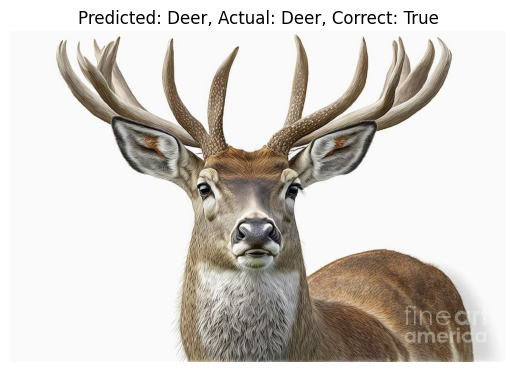

Image 1: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


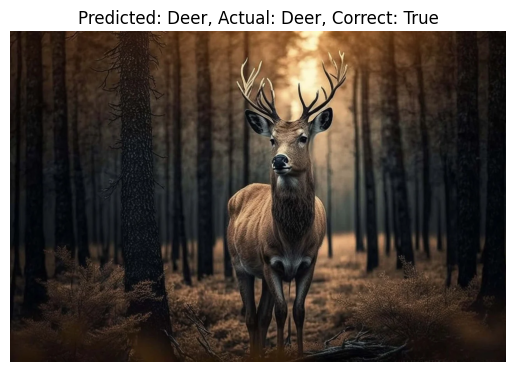

Image 2: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


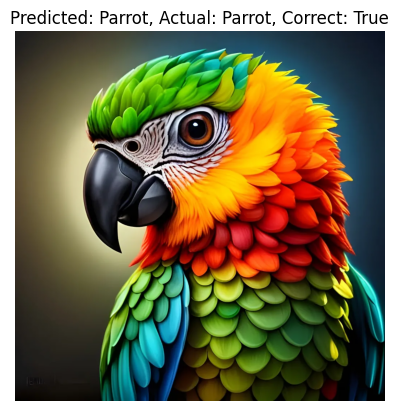

Image 3: Predicted class: Parrot, Actual class: Parrot, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


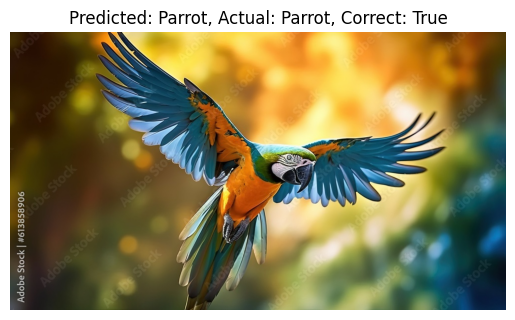

Image 4: Predicted class: Parrot, Actual class: Parrot, Correct: True


In [23]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_3.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Parrot' if predicted_class == 1 else 'Deer'
    actual_class_name = 'Parrot' if actual_label == 1 else 'Deer'
    plt.title(f"Predicted: {predicted_class_name}, Actual: {actual_class_name}, Correct: {correct}")
    plt.axis('off')
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

### Model 4 : Transfer learning using VGG16 or VGG19 with tuning all layers

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


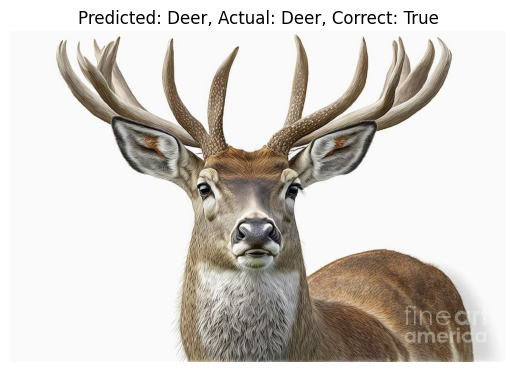

Image 1: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


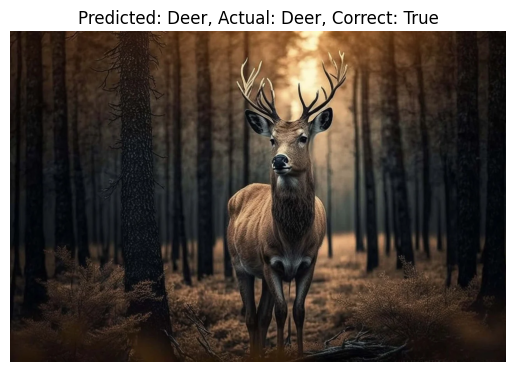

Image 2: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


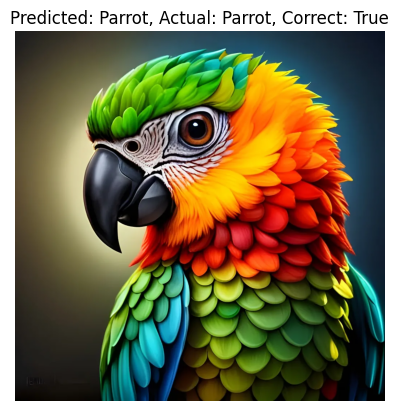

Image 3: Predicted class: Parrot, Actual class: Parrot, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


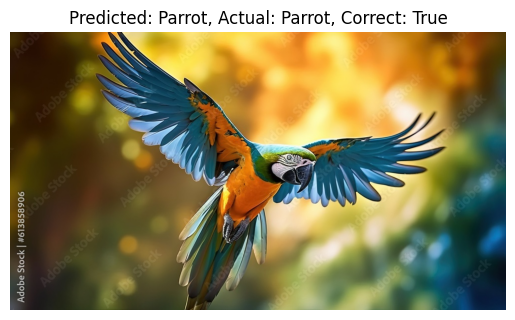

Image 4: Predicted class: Parrot, Actual class: Parrot, Correct: True


In [ ]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_4.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Parrot' if predicted_class == 1 else 'Deer'
    actual_class_name = 'Parrot' if actual_label == 1 else 'Deer'
    plt.title(f"Predicted: {predicted_class_name}, Actual: {actual_class_name}, Correct: {correct}")
    plt.axis('off')
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")

### Model 5 : Transfer learning using VGG16 or VGG19 with tuning only final MLP layers

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


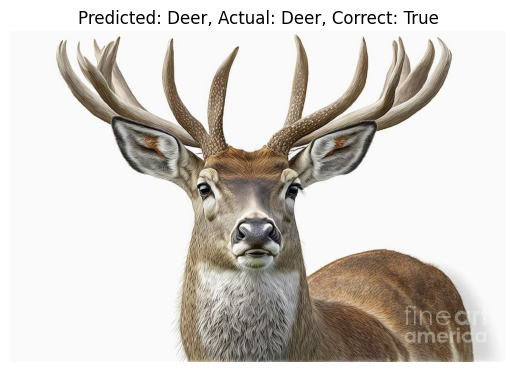

Image 1: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


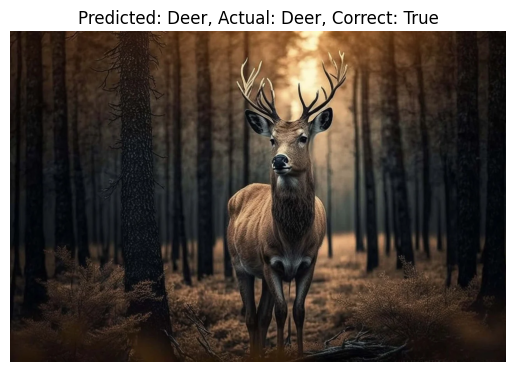

Image 2: Predicted class: Deer, Actual class: Deer, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


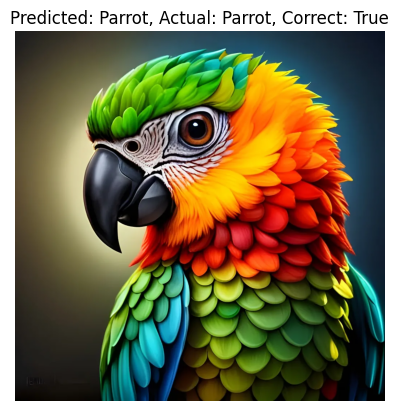

Image 3: Predicted class: Parrot, Actual class: Parrot, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


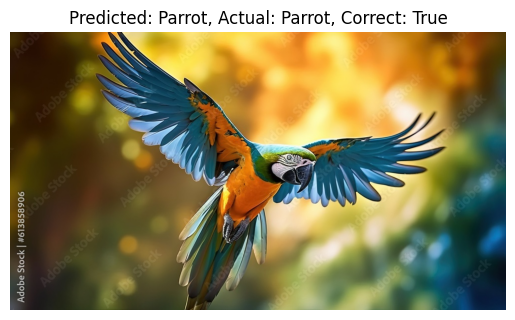

Image 4: Predicted class: Parrot, Actual class: Parrot, Correct: True


In [ ]:
for i, image_path in enumerate(image_paths):
    img = preprocess_image(image_path)
    prediction = model_5.predict(img)
    predicted_class = 1 if prediction >= 0.5 else 0
    actual_label = image_labels[i]
    correct = predicted_class == actual_label
    
    img = load_img(image_path)
    plt.imshow(img)
    predicted_class_name = 'Parrot' if predicted_class == 1 else 'Deer'
    actual_class_name = 'Parrot' if actual_label == 1 else 'Deer'
    plt.title(f"Predicted: {predicted_class_name}, Actual: {actual_class_name}, Correct: {correct}")
    plt.axis('off')
    plt.show()
    
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Actual class: {actual_class_name}, Correct: {correct}")